In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)


/var/folders/vk/4zznpqds6r3d053j58lwq6nh0000gn/T/ipykernel_81432/3132758572.py:5: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

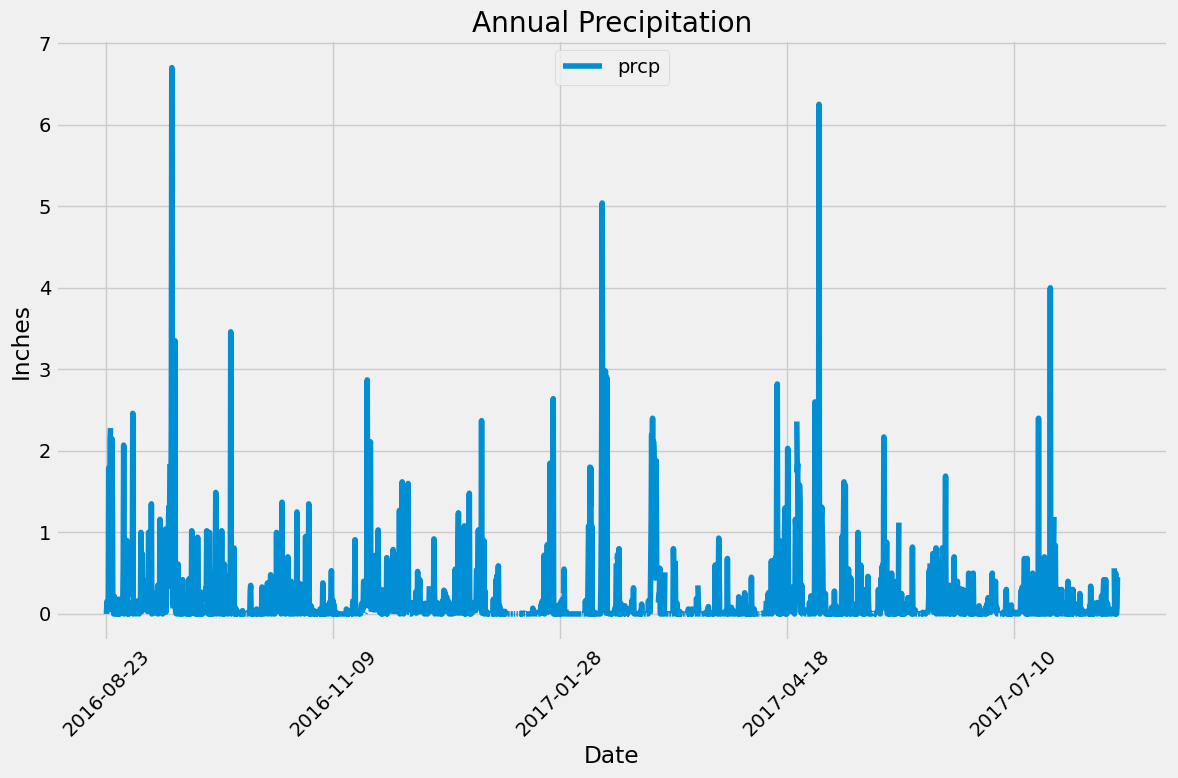

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
annual_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
annual_prcp

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores for the last year of data
annual_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
annual_prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
annual_prcp_df = pd.DataFrame(annual_prcp, columns=['date', 'prcp'])
annual_prcp_df

# Sort the dataframe by date
annual_prcp_df.set_index('date', inplace=True)
annual_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
annual_prcp_df.plot(title="Annual Precipitation", figsize=(12,8))
plt.legend(loc='upper center')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
annual_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
most_active_station

most_active_station_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()
most_active_station_temps, most_active_station

([(54.0, 85.0, 71.66378066378067)], 'USC00519281')

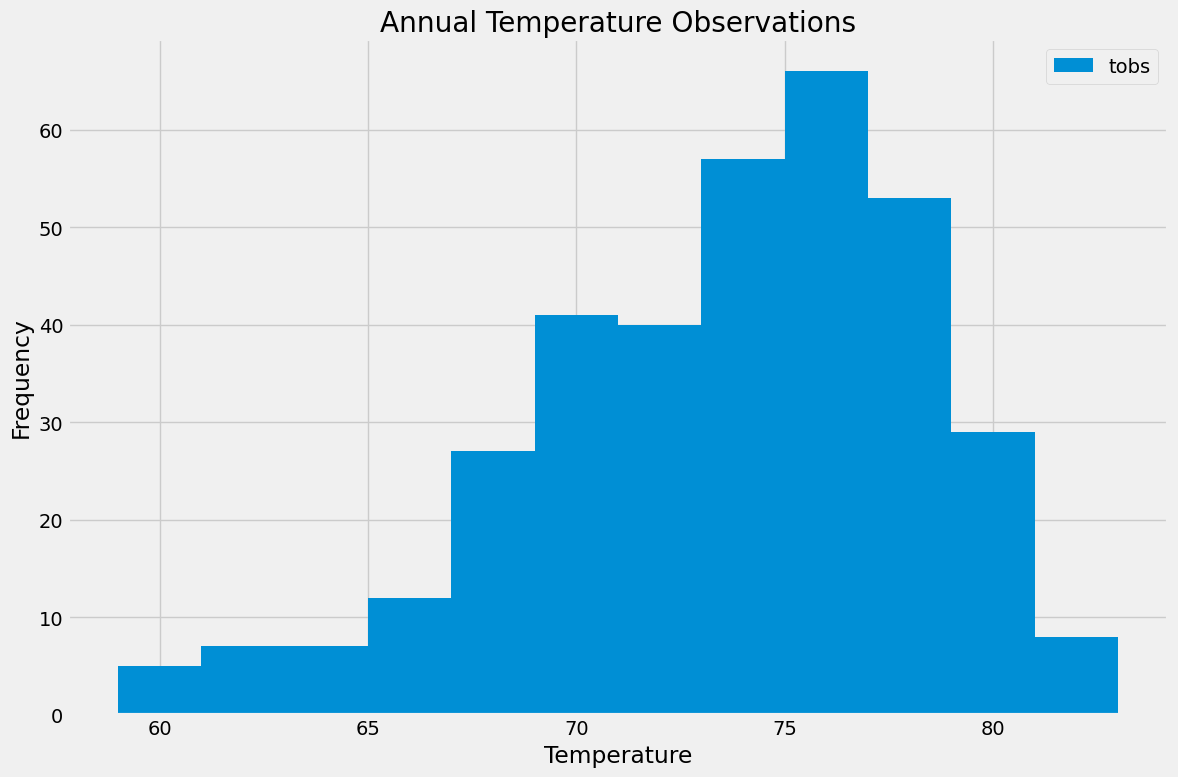

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
annual_tobs = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= '2016-08-23').\
    filter(measurement.station == most_active_station).\
    order_by(measurement.date).all()
annual_tobs

# Plot the results in a histogram
annual_tobs_df = pd.DataFrame(annual_tobs, columns=['date', 'tobs'])
annual_tobs_df

annual_tobs_df.plot.hist(bins=12, title="Annual Temperature Observations", figsize=(12,8))
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

# Close Session

In [26]:
# Close Session
session.close()